#UNIVERSIDAD POLITECNICA SALESIANA
#ALUMNO: RAYNER PALTA
#MATERIA: SIMULACION


##La persona llega 20 minutos antes de la hora de vacunacion
##Ingresa a la cola/fila a que toque su turno 
##Tenemos un proceso de control en donde se toma los signos vitales y se valida que este dentro del padron (2-5 minutos)
##Se procede al traslado a la cama/silla de vacunacion y se inyecta la dosis de la vacuna este proceso tarde entre (5-10 minutos).
##Finalmente llevados a la salida entre (1-3 minutos).
##Finalmente generar las siguientes metricas/graficas:

#Tiempo de espera promedio para cada persona.
##Tiempo promedio total que requiere un paciente para ser vacunado.
##Cuantos pacientes se atendieron.
##Cuantos pacientes se quedaron sin atender.

In [2]:
pip install simpy

In [3]:
import simpy
import random
import matplotlib.pyplot as pp

In [4]:
MAX_VACUNAS = 3000
# Total de numero de mesas para vacunacion
NUM_MESAS = 3
PACIENTES = 4800

INTERVALO_LLEGADA = 20 #minutos
# Tiempo de simulación
TIEMPO_SIMULACION = 480 
INTERVALO = 10
tiempo_vacunacion={}

vacunados =[]

no_vacunados = []

class Punto(object):
    
    def __init__(self, environment, num_mesas, nombre):
        self.env=environment
        self.mesas = simpy.Resource(environment, num_mesas)
        self.nombre = nombre
        
    def verificar_estado(self, paciente):
        t_con = random.randint(2,5)
        yield self.env.timeout(t_con)
            
    #Para traslado a la cama/silla de vacunacion y se inyecta
    def vacunar_paciente(self, paciente):
        t_vacunacion = random.randint(5,10)
        print("Tiempo tomado: ",t_vacunacion," para paciente: ",paciente)
        yield self.env.timeout(t_vacunacion)
        
        k = int(paciente.strip('Paciente-'))
        print("Paciente ",k)
        if k in tiempo_vacunacion:
            tiempo_vacunacion[k]=tiempo_vacunacion[k]+1
        else:
            tiempo_vacunacion[k]=t_vacunacion
            
    def salida_paciente(self,paciente):
        t_salida = random.randint(1,3)
        yield self.env.timeout(t_salida)
        
        
       
    
def llegada_paciente(env, nombre,punto):
   
    print('Llega el paciente: %s a la hora %.2f.' % (nombre, env.now))

    with punto.mesas.request() as mesa:
        # Ocupamos la mesa de vacunacion
        yield mesa
        print('Se traslada el paciente: %s a la hora %.2f.' % (nombre,env.now))
        yield env.process(punto.verificar_estado(nombre))
        
        estado = random.randint(1,2)
        print("Sintomas: ",estado)
        if estado == 1:            
            no_vacunados.append(nombre)
            
        else:
            print('Ingresa el paciente a las %s a la hora %.2f.' % (nombre, env.now))
            yield env.process(punto.vacunar_paciente(nombre))
            print('Paciente [%s] vacunado a las %.2f.' % (nombre, env.now))
            vacunados.append(nombre)
            
        yield env.process(punto.salida_paciente(nombre))
        print('Paciente [%s] trasladado a la salida a las %.2f.' %(nombre,env.now))
        
        
def ejecutar_simulacion(env,num_mesas, pacientes,intervalo):
    punto = Punto(env,num_mesas,"Cuenca 1")
    for i in range(pacientes):
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),punto))
    while True:
        yield env.timeout(random.randint(intervalo-10,intervalo+10))
        i+=1
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),punto))
    
print("Vacunacion")
env=simpy.Environment()
print("p ", PACIENTES)
env.process(ejecutar_simulacion(env, NUM_MESAS,PACIENTES,INTERVALO))
env.run(until = TIEMPO_SIMULACION)

Streaming output truncated to the last 5000 lines.
Llega el paciente: Paciente-600 a la hora 0.00.
Llega el paciente: Paciente-601 a la hora 0.00.
Llega el paciente: Paciente-602 a la hora 0.00.
Llega el paciente: Paciente-603 a la hora 0.00.
Llega el paciente: Paciente-604 a la hora 0.00.
Llega el paciente: Paciente-605 a la hora 0.00.
Llega el paciente: Paciente-606 a la hora 0.00.
Llega el paciente: Paciente-607 a la hora 0.00.
Llega el paciente: Paciente-608 a la hora 0.00.
Llega el paciente: Paciente-609 a la hora 0.00.
Llega el paciente: Paciente-610 a la hora 0.00.
Llega el paciente: Paciente-611 a la hora 0.00.
Llega el paciente: Paciente-612 a la hora 0.00.
Llega el paciente: Paciente-613 a la hora 0.00.
Llega el paciente: Paciente-614 a la hora 0.00.
Llega el paciente: Paciente-615 a la hora 0.00.
Llega el paciente: Paciente-616 a la hora 0.00.
Llega el paciente: Paciente-617 a la hora 0.00.
Llega el paciente: Paciente-618 a la hora 0.00.
Llega el paciente: Paciente-619 a la 

Text(0.5, 0, 'Tiempo tomado')

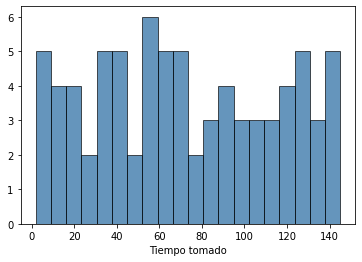

In [8]:
grafi=sorted(tiempo_vacunacion.items())
x, y =zip(*grafi)
result = pp.hist(x,bins=20,color='#125D98',edgecolor='k',alpha=0.65)
pp.xlabel("Pacientes")
pp.xlabel("Tiempo tomado")

In [ ]:
#